# Radio Frequency 

## I start with using some libraries in python to process the data and then applying machine learning algorithms to the dataset in order to classify the signals.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import re
from scipy import io
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')


seaborn.set()

In [2]:
name = 'test_database';
D = io.loadmat('test_database.mat')

In [4]:
print D

{'database': array([[-0.06499669, -0.00315652, -0.00069118, ..., -0.0740364 ,
        -0.00627516,  0.0032653 ],
       [-0.09828298, -0.00655901, -0.00126944, ..., -0.07464067,
        -0.01537706,  0.00566534],
       [-0.14349941, -0.01017027, -0.00183318, ..., -0.07669541,
        -0.02873383,  0.00841766],
       ..., 
       [-0.02551985, -0.01588535, -0.02188063, ..., -0.02041244,
         0.07707567,  0.03364445],
       [-0.02568363, -0.01446984, -0.02067509, ..., -0.02188637,
         0.07084561,  0.03097925],
       [-0.02601266, -0.01315204, -0.0194031 , ..., -0.0238579 ,
         0.06548346,  0.02892085]]), 'labels': array([ u'nnnmsmnnnnnnnnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnssssssss

In [5]:
D1 = D['database']

In [6]:
print D1

[[-0.06499669 -0.00315652 -0.00069118 ..., -0.0740364  -0.00627516
   0.0032653 ]
 [-0.09828298 -0.00655901 -0.00126944 ..., -0.07464067 -0.01537706
   0.00566534]
 [-0.14349941 -0.01017027 -0.00183318 ..., -0.07669541 -0.02873383
   0.00841766]
 ..., 
 [-0.02551985 -0.01588535 -0.02188063 ..., -0.02041244  0.07707567
   0.03364445]
 [-0.02568363 -0.01446984 -0.02067509 ..., -0.02188637  0.07084561
   0.03097925]
 [-0.02601266 -0.01315204 -0.0194031  ..., -0.0238579   0.06548346
   0.02892085]]


In [7]:
D2 = D['labels']

In [8]:
print D2

[ u'nnnmsmnnnnnnnnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnmmnnnssssnnnmnnnnnnnnnnnnnmsssssssmnnnnnnnnnnmsssssssmnnnmsssmnnmmnnnnnnnnnnnnnnnmssssssmnmsmnnnmsssmnnnmnnnmmnnnssssnnnmnnnnnmmnnnssssnnnmnnnnnnmssssnnnmnnnnnnnnnmsssssssmnnnnnnnnnnnmsssmnnmmnnnnnnmssssssssmnnnnnnnnmssssssssmnnnnnnnnnssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnmssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnmssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnmssssssssmnnnnnnnnnssssssssmnnnnnnnnnsss

In [9]:
print np.shape(D1)

(8959, 1152)


In [10]:
print np.shape(D2)

(1,)


In [11]:
out = {'database':D1, 'labels':D2}
io.savemat('dataset', out)

In [12]:
dataset = io.loadmat('dataset.mat')

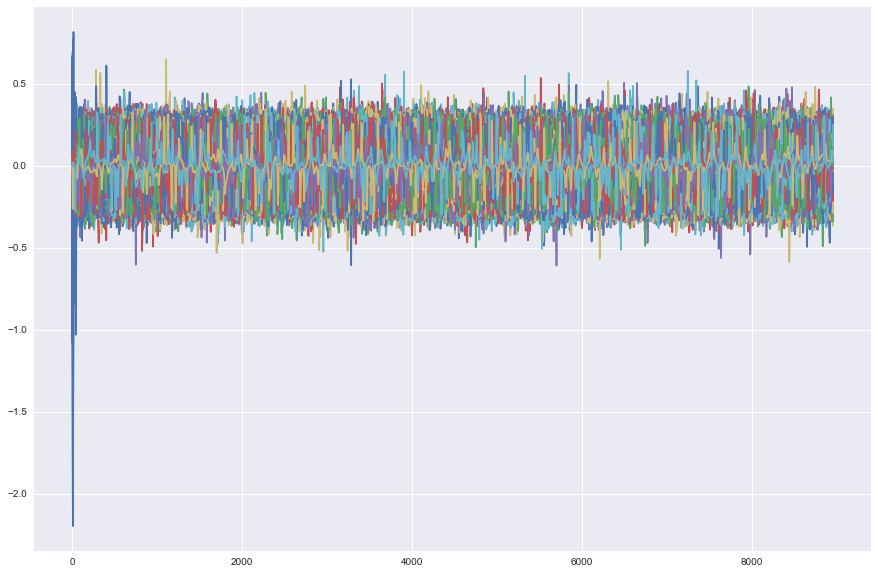

In [13]:
fig = plt.figure(figsize = (15,10))
plt.plot(np.reshape(D1, (8959,1152),'F'))
plt.show()

In [14]:
database = D1
labels = D2

In [15]:
database1 = database[0,:]

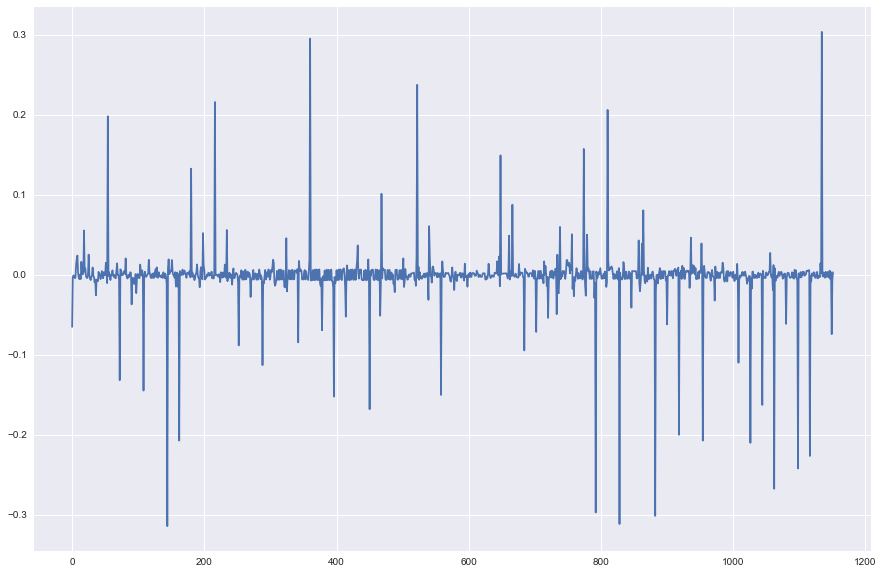

In [16]:
fig = plt.figure(figsize=(15, 10))
plt.plot(database1)
plt.show()

In [19]:
import scipy as scp
from scipy import signal
from scipy import fftpack

In [20]:
F = scp.fftpack.fft(database1)

In [21]:
print F

[-2.16190086+0.j         -1.35683419-0.78081695j  0.43853428-1.07649527j
 ...,  0.23055078-0.03286171j  0.43853428+1.07649527j
 -1.35683419+0.78081695j]


In [22]:
print np.shape(F)

(1152,)


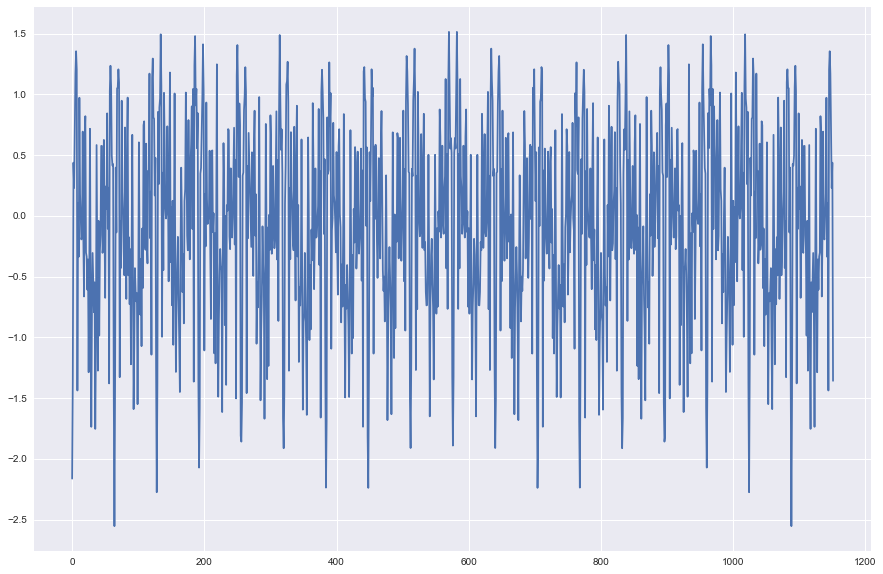

In [23]:
fig = plt.figure(figsize=(15, 10))
plt.plot(F)
plt.show()

In [24]:
widths = np.arange(1, 15)
W = scp.signal.cwt(database1,signal.ricker,widths)

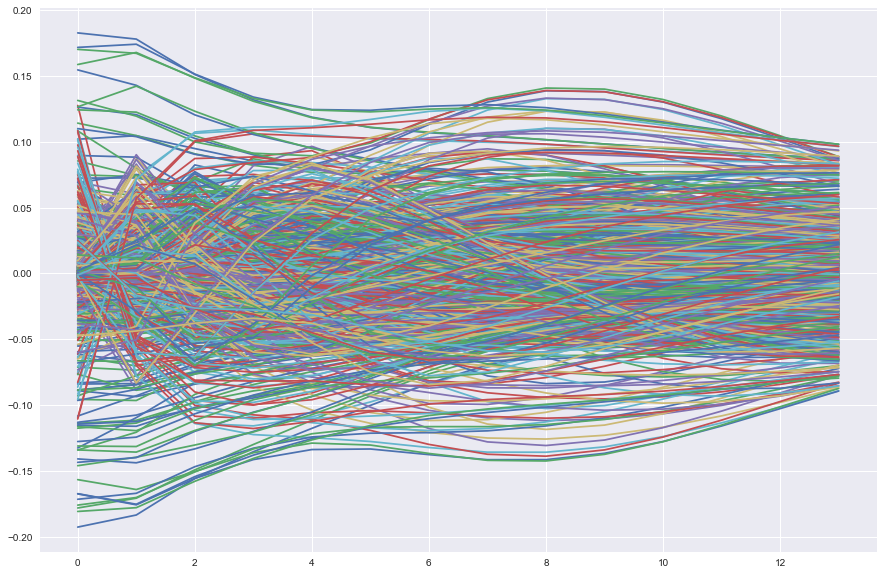

In [25]:
fig = plt.figure(figsize=(15, 10))
plt.plot(W)
plt.show()

In [26]:
database2 = database[:,0]

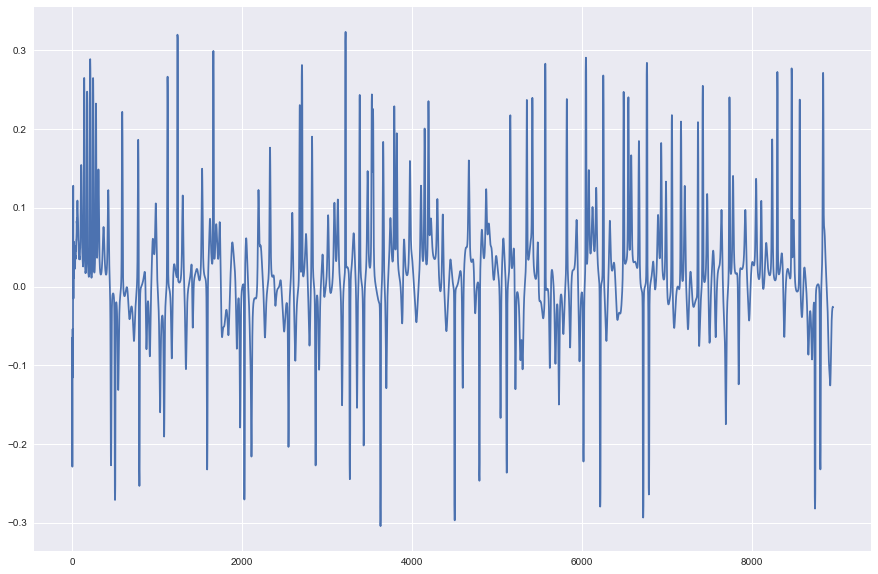

In [27]:
fig = plt.figure(figsize=(15,10))
plt.plot(database2)
plt.show()

In [28]:
widths = np.arange(1, 15)
W2 = scp.signal.cwt(database2,signal.ricker,widths)

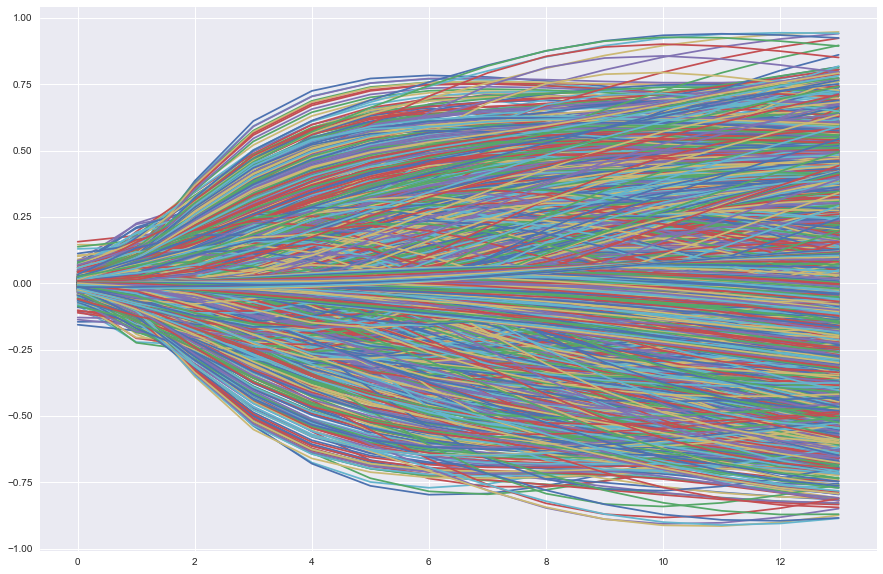

In [29]:
fig = plt.figure(figsize=(15, 10))
plt.plot(W2)
plt.show()

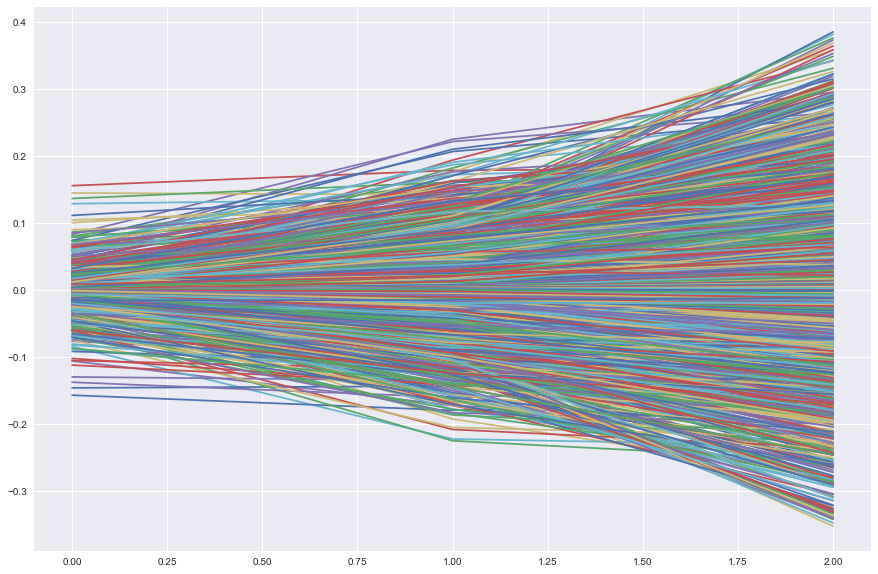

In [30]:
widths = np.arange(1, 4)
W2 = scp.signal.cwt(database2,signal.ricker,widths)
fig = plt.figure(figsize=(15, 10))
plt.plot(W2)
plt.show()

In [33]:
print D2

[ u'nnnmsmnnnnnnnnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnmmnnnssssnnnmnnnnnnnnnnnnnmsssssssmnnnnnnnnnnmsssssssmnnnmsssmnnmmnnnnnnnnnnnnnnnmssssssmnmsmnnnmsssmnnnmnnnmmnnnssssnnnmnnnnnmmnnnssssnnnmnnnnnnmssssnnnmnnnnnnnnnmsssssssmnnnnnnnnnnnmsssmnnmmnnnnnnmssssssssmnnnnnnnnmssssssssmnnnnnnnnnssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnmssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnmssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnmssssssssmnnnnnnnnnssssssssmnnnnnnnnnsss

In [34]:
D2str = ''.join(D2)

In [35]:
print D2str

nnnmsmnnnnnnnnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnnnnnnnnnssmnnnnnnnnmsmnnnnnnnnnnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnnnssssssssssssmnnnnnmsssssssssssmnnnnnmsssssssssssmnnnmmnnnssssnnnmnnnnnnnnnnnnnmsssssssmnnnnnnnnnnmsssssssmnnnmsssmnnmmnnnnnnnnnnnnnnnmssssssmnmsmnnnmsssmnnnmnnnmmnnnssssnnnmnnnnnmmnnnssssnnnmnnnnnnmssssnnnmnnnnnnnnnmsssssssmnnnnnnnnnnnmsssmnnmmnnnnnnmssssssssmnnnnnnnnmssssssssmnnnnnnnnnssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnmssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnmssssssssmnnnnnnnnnnnnnnnssssssssmnnnnnnnnnssssssssmnnnnmssssssssmnnnnnnnnnssssssssmnnnnnnnnnsssssss

In [37]:
D2sep = list(D2str)
D2separray = np.asarray(D2sep)

In [38]:
D2separrayReshape = np.reshape(D2separray, (128,9),'F')

In [39]:
D2separrayReshape

array([[u'n', u'n', u's', ..., u's', u's', u'n'],
       [u'n', u'n', u's', ..., u's', u'm', u'n'],
       [u'n', u'n', u's', ..., u's', u'n', u'n'],
       ..., 
       [u'n', u'n', u's', ..., u's', u'n', u'n'],
       [u'n', u'm', u's', ..., u's', u'n', u'n'],
       [u'n', u's', u's', ..., u's', u'n', u'n']], 
      dtype='<U1')

('spectrogram shape:', (8959, 1152))


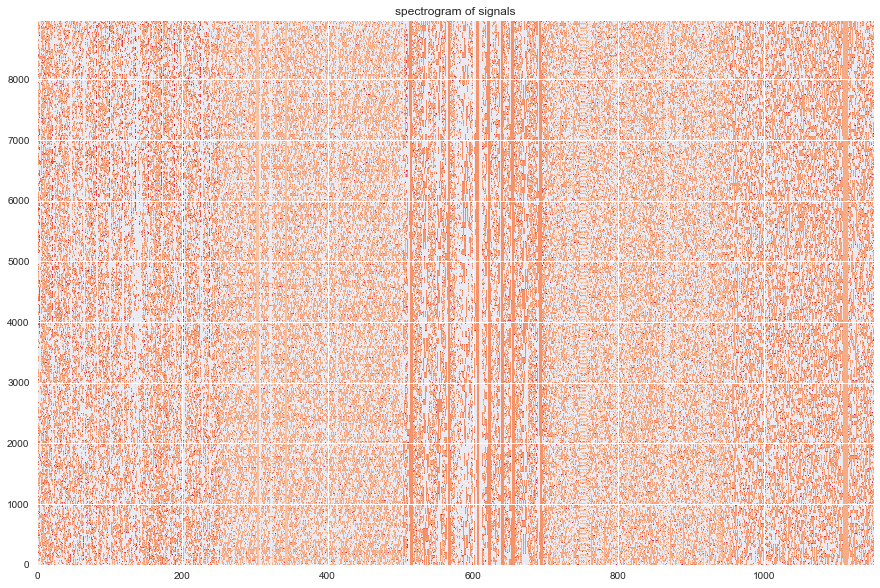

In [40]:
log_spect = np.log(D1)
print('spectrogram shape:', log_spect.shape)
fig = plt.figure(figsize=(15, 10))
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of signals')
plt.show()

In [41]:
j =0

for i in D2sep:    
    if i == 'n':
        D2sep[j] = 0
    elif i == 's':
        D2sep[j] = 1
    elif i == 'm':
        D2sep[j] = 2
    j=j+1

In [42]:
D2sep

[0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [114]:
D2sepbinary = D2sep

In [153]:
X = database1
Y = D2sepbinary
shuffle = np.random.permutation(np.arange(X.shape[0]))

In [154]:
print np.shape(X)
shuffle

(1152,)


array([ 332,  266, 1063, ...,  684,  593, 1057])

In [155]:
Y = np.asarray(Y)

In [156]:
X, Y = X[shuffle], Y[shuffle]

In [164]:
M = X.shape[0]
M_train = int(M*0.8)
print np.shape(X[shuffle])

(1152,)


In [165]:
X_train = X[shuffle]
X_dev = X[M_train:]
Y_train = Y[:M_train]
Y_dev = Y[M_train:]

In [168]:
X_train = np.reshape(X_train, (128,9),'F')
X_train

array([[  6.59845064e-03,   2.92142151e-03,  -6.35000054e-03, ...,
          9.18325816e-03,  -4.33234518e-03,   6.98760456e-03],
       [  3.50117945e-03,  -1.05659040e-03,   1.84201549e-03, ...,
         -1.37442199e-03,   2.62299457e-03,  -6.64408842e-03],
       [  8.36269182e-03,   3.95639874e-03,  -3.03092116e-03, ...,
         -2.67233932e-01,  -5.70126358e-03,  -4.17274194e-03],
       ..., 
       [ -3.81467536e-03,   2.34848409e-03,  -1.95972403e-03, ...,
          2.17760534e-03,   6.06228708e-03,  -6.48029767e-03],
       [ -5.52177540e-03,  -3.91922559e-03,   1.70546678e-03, ...,
         -3.34481616e-03,  -6.63087586e-03,  -2.10258130e-04],
       [ -4.70808335e-03,  -6.92755135e-03,   1.45872472e-03, ...,
         -1.36655480e-03,   2.36768929e-03,   2.10155716e-03]])

In [169]:
Y_train = Y[shuffle]

In [170]:
Y_train

array([2, 1, 1, ..., 1, 0, 0])

In [171]:
print np.shape(Y_train)

(1152,)


In [173]:
Y_train = np.reshape(Y_train,(128,9),'F')

In [174]:
Y_train

array([[2, 1, 0, ..., 0, 2, 0],
       [1, 1, 0, ..., 0, 2, 0],
       [1, 1, 2, ..., 0, 2, 0],
       ..., 
       [0, 0, 1, ..., 2, 1, 1],
       [1, 1, 2, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]])

In [175]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [178]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10)
dt.fit(X_train, Y_train)
#print('Accuracy (a decision tree):', dt.score(X_dev, Y_dev))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [179]:
from sklearn.datasets import load_iris

In [180]:
clf = tree.DecisionTreeClassifier()

In [181]:
iris = load_iris()

In [182]:
clf = clf.fit(iris.data, iris.target)

In [183]:
tree.export_graphviz(clf, out_file='tree.png')

In [185]:
vec_acc = []
for num_est in [5,10,50,100, 500, 800, 1000, 1500]:
    rfc = RandomForestClassifier(criterion = "entropy", n_estimators=num_est)
    rfc.fit(X_train, Y_train)